In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def load_data(file_path):
    """
    Load a CSV file into a pandas DataFrame.
    Parameters:
        file_path (str): Path to the CSV file.
    Returns: pd.DataFrame: Loaded DataFrame.
    """
    return pd.read_csv(file_path, encoding="ISO-8859-1")

In [3]:
def explore_data(df):
    """Display basic information about the DataFrame.
    Parameters: 
        df (pd.DataFrame): The DataFrame to explore.
    """
    print(df.head())
    print(df.describe())
    print(df.info())

In [4]:
def clean_data(df):
    """
    Select and clean relevant columns by removing rows with missing values.
    Parameters:
        df (pd.DataFrame): Original DataFrame.
    Returns:
        pd.DataFrame: Cleaned DataFrame with selected columns.
    """
    cols = ['Mortality Rate (Facility)', 'Readmission Rate (Facility)', 'Hospitalization Rate (Facility)', 'Transfusion Rate (Facility)']
    return df[cols].dropna(subset=cols)

In [5]:
def plot_histograms(df):
    """
    Plot histograms for all numerical columns in the DataFrame.
    Parameters:
        df (pd.DataFrame): DataFrame containing numerical columns.
    """
    df.hist(bins=12, figsize=(12, 10))
    plt.show()

In [6]:
def plot_scatter(df):
    """
    Plot a scatter plot of Transfusion Rate vs Mortality Rate.

    Parameters:
        df (pd.DataFrame): DataFrame containing the relevant columns.
    """
    df.plot(kind="scatter", x='Transfusion Rate (Facility)', y='Mortality Rate (Facility)', grid=True)
    plt.show()

In [7]:
def split_data(df):
    """
    Split the dataset into training and testing sets.

    Parameters:
        df (pd.DataFrame): Cleaned DataFrame.
    Returns:
        tuple: X_train, X_test, y_train, y_test
        """
    X = df.drop(columns=['Mortality Rate (Facility)'])
    y = df['Mortality Rate (Facility)']
    return train_test_split(X, y, test_size=0.2, random_state=12)

In [8]:
def train_model(X_train, y_train):
    """
    Train a linear regression model.
    
    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target.

    Returns:
        LinearRegression: Trained model.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [9]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluate the model using RMSE and relative error.

    Parameters:
        model (LinearRegression): Trained model.
        X_train, X_test (pd.DataFrame): Training and testing features.
        y_train, y_test (pd.Series): Training and testing targets.
    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    rmse_train = mean_squared_error(y_train, pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, pred_test, squared=False)
    print("Train RMSE:", rmse_train)
    print("Test RMSE:", rmse_test)
    print("Test Predictions:", pred_test[:10].round(3))
    print("Actual Values:", y_test[:10].values)
    rel_error = np.abs(pred_test - y_test) / y_test * 100
    print("Relative Errors (%):", rel_error[:10].values)

In [10]:
def plot_simple_model(X_test, y_test, predictions):
    """
    Plot the simple linear regression model predictions.

    Parameters:
        X_test (pd.DataFrame): Test feature (Transfusion Rate).
        y_test (pd.Series): Actual target values.
        predictions (np.ndarray): Predicted target values.
    """
    plt.scatter(X_test, y_test, color='blue', label='Measurements')
    plt.plot(X_test, predictions, color='red', linewidth=2, label='Model Predictions')
    plt.xlabel("Transfusion Rate (Facility)")
    plt.ylabel("Mortality Rate (Facility)")
    plt.legend(loc="upper left")
    plt.show()

In [11]:
def main():
    """
    Main function to run the data analysis and modeling pipeline.
    """
    file_path = 'DFC_FACILITY.csv'
    df = load_data(file_path)
    explore_data(df)
    df_clean = clean_data(df)
    plot_histograms(df_clean)
    plot_scatter(df_clean)

    X_train, X_test, y_train, y_test = split_data(df_clean)

    # Full model
    full_model = train_model(X_train, y_train)
    evaluate_model(full_model, X_train, X_test, y_train, y_test)

    # Simple model
    X_train_simple = X_train[['Transfusion Rate (Facility)']]
    X_test_simple = X_test[['Transfusion Rate (Facility)']]
    simple_model = train_model(X_train_simple, y_train)
    simple_preds_test = simple_model.predict(X_test_simple)
    simple_rmse_test = mean_squared_error(y_test, simple_preds_test, squared=False)
    print("Simple Model Test RMSE:", simple_rmse_test)
    plot_simple_model(X_test_simple, y_test, simple_preds_test)


   CMS Certification Number (CCN)  Network  \
0                           12306        8   
1                           12500        8   
2                           12501        8   
3                           12502        8   
4                           12505        8   

                           Facility Name       Five Star Date  Five Star  \
0            CHILDRENS HOSPITAL DIALYSIS  01Jan2020-31Dec2023        NaN   
1                       FMC CAPITOL CITY  01Jan2020-31Dec2023        1.0   
2                DaVita Gadsden Dialysis  01Jan2020-31Dec2023        2.0   
3  DaVita Tuscaloosa University Dialysis  01Jan2020-31Dec2023        1.0   
4                  DaVita PDI-Montgomery  01Jan2020-31Dec2023        3.0   

   Five Star Data Availability Code          Address Line 1 Address Line 2  \
0                               260   1600 7TH AVENUE SOUTH            NaN   
1                                 1    255 S JACKSON STREET            NaN   
2                               

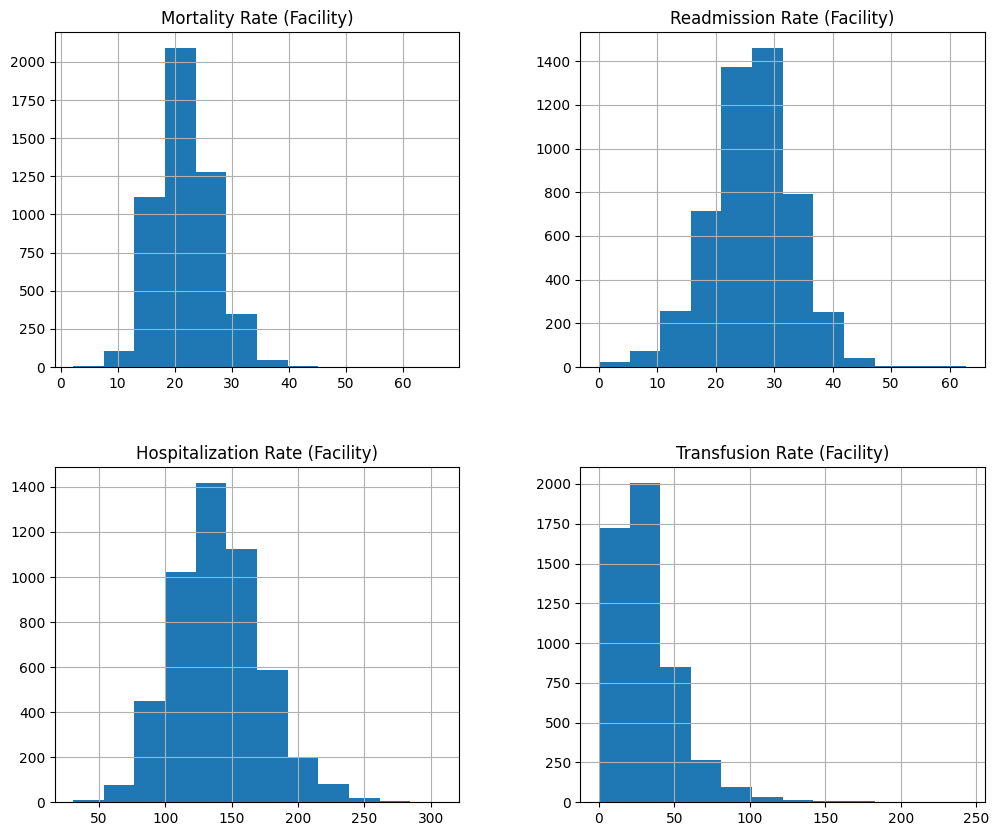

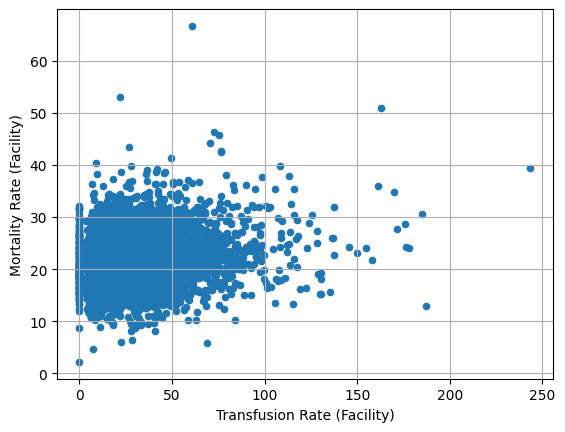

Train RMSE: 4.898256389774145
Test RMSE: 5.127931029201776
Test Predictions: [22.52  21.098 21.405 20.469 21.    22.19  20.708 22.434 21.419 21.868]
Actual Values: [22.  14.4 11.3 19.1 16.3 23.  15.5 23.2 22.9 20.8]
Relative Errors (%): [ 2.36448865 46.51394902 89.42139739  7.16557005 28.83239043  3.52098489
 33.59703882  3.30336793  6.46676561  5.13622335]
Simple Model Test RMSE: 5.159587833715236


/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


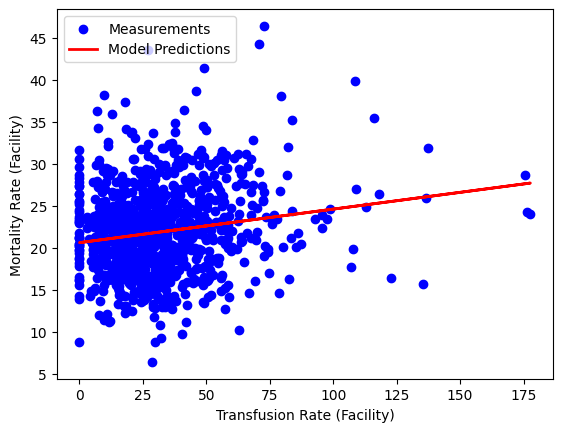

In [12]:
if __name__ == "__main__":
    main()